# Visualizing the benchmark
This notebook offers a straightforward way to visualize the benchmark results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotting import benchmarkParse, plotBenchmark, benchRank

### loading the benchmark json file

_Replace 'results/results.json' to your file paths when calling benchmarkParse_

In [2]:
data_bench = benchmarkParse('results/results.json')
data_juce = benchmarkParse('results/results_juce.json')
data_bench.head()
data_juce


,library,sampleNumber,iterations,real_time,cpu_time,time_unit
0,jucefft,16,5600000,111.142839,111.607143,ns
1,jucefft,32,2357895,305.117319,304.826975,ns
2,jucefft,64,1000000,546.331900,546.875000,ns
3,jucefft,128,497778,1412.346065,1412.527271,ns
4,jucefft,256,263529,2597.370309,2608.821041,ns
5,jucefft,512,112000,6579.878572,6417.410714,ns
6,jucefft,1024,56000,12306.591072,12276.785714,ns
7,jucefft,2048,23579,29922.770264,29819.966920,ns
8,jucefft,4096,10000,58458.920009,57812.500000,ns
9,jucefft,8192,4978,142066.010466,141246.484532,ns


_(optional) if they are in the same output file, you can seperate the FFT and Biquad Benchmarks form each other and adding the Juce benchmark_

In [3]:
lastFFTindex = 11
data_juce_fft = data_juce.iloc[:lastFFTindex,:]
data_juce_biquad = data_juce.iloc[lastFFTindex:,:]

lastFFTindex = 76
data_fft = data_bench.iloc[:lastFFTindex,:]
data_biquad = data_bench.iloc[lastFFTindex:,:]

data_fft = data_fft._append(data_juce_fft)
data_biquad = data_biquad._append(data_juce_biquad)

#print unique libraries in the dataframe
print('FFT libraries: ' + str(data_fft['library'].unique()) + '\n')
print('Biquad libraries: ' + str(data_biquad['library'].unique()))


FFT libraries: ['muFFT' 'pffft' 'PocketFFT<double>' 'PocketFFT<float>' 'meowfft' 'qfft'
 'jucefft']

Biquad libraries: ['moog' 'snd' 'maxiBiquadProcess<float>' 'maxiBiquadProcess<double>'
 'bela' 'sst' 'cmsis_dsp_float' 'cmsis_dsp_double' 'Iir' 'q<float>'
 'q<double>' 'jucebiquad']


_Outputing into latex table_

In [4]:
with open('results/data_fft.tex','w') as f:
    f.write(data_fft.to_latex(index=False,escape=True))
with open('results/data_biquad.tex','w') as f:
    f.write(data_biquad.to_latex(index=False,escape=True))


### Plotting FFT Libraries

plotting all libraries


c:\Users\User\Desktop\Thesis - DSP optimization for ARM processors\benchmark-visual\plotting.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xticks(samplesLibs[0].astype(int))


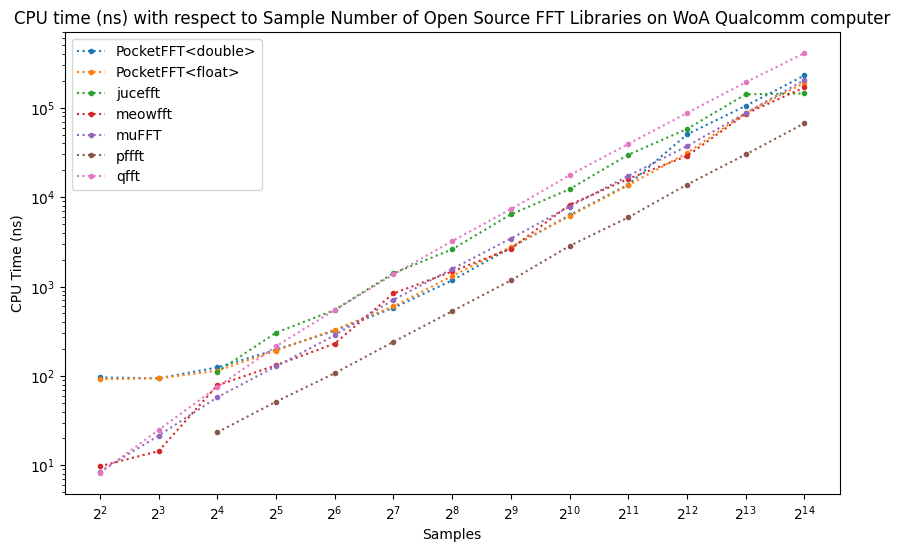

In [5]:
figure = plotBenchmark(data_fft, plotTitle='CPU time (ns) with respect to Sample Number of Open Source FFT Libraries on WoA Qualcomm computer')
figure.savefig('results/figure_fft.pdf')
plt.show()

### Plotting Biquad Libraries

plotting all libraries


c:\Users\User\Desktop\Thesis - DSP optimization for ARM processors\benchmark-visual\plotting.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xticks(samplesLibs[0].astype(int))


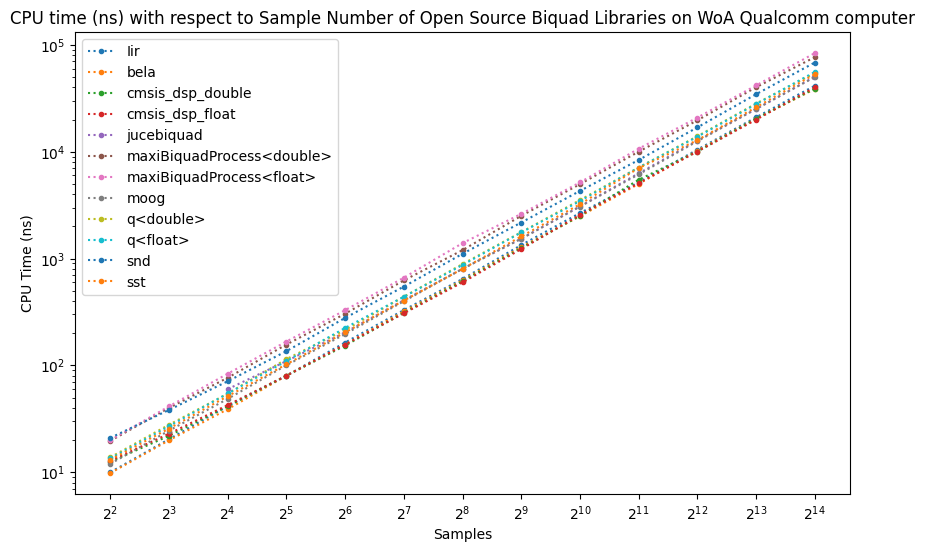

In [6]:
figure = plotBenchmark(data_biquad, plotTitle='CPU time (ns) with respect to Sample Number of Open Source Biquad Libraries on WoA Qualcomm computer')
figure.savefig('results/figure_biquad.pdf')
plt.show()

### Plotting specific libraries example

asd not found in dataset


c:\Users\User\Desktop\Thesis - DSP optimization for ARM processors\benchmark-visual\plotting.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xticks(samplesLibs[0].astype(int))


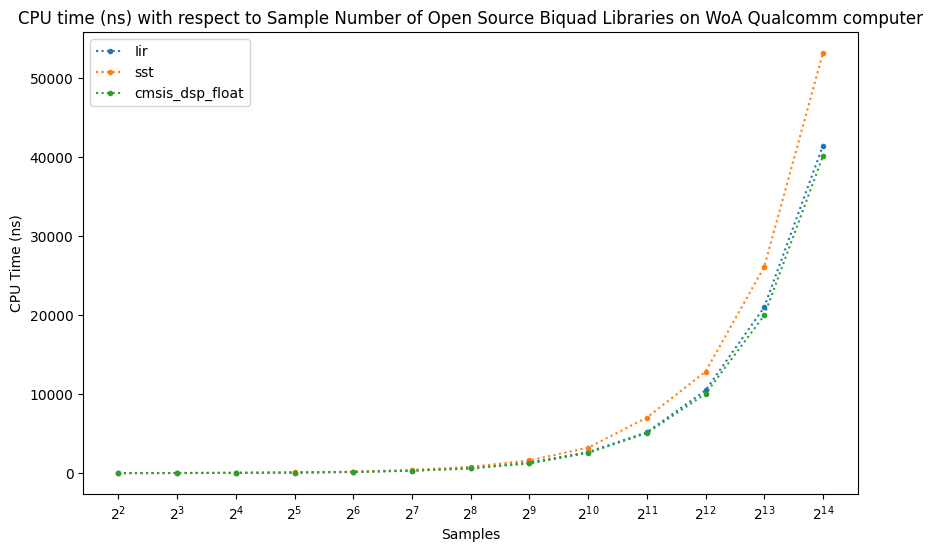

In [7]:
libs = ['Iir','sst','asd','cmsis_dsp_float']
figure = plotBenchmark(data_biquad, isLog=False, libraries=libs,plotTitle='CPU time (ns) with respect to Sample Number of Open Source Biquad Libraries on WoA Qualcomm computer')
figure.savefig('results/figure_biquad.pdf') 
plt.show()

### Ranking libraries

In [45]:
ranked_biquad = benchRank(data_biquad)
ranked_fft, list_fft = benchRank(data_fft)
ranked_fft[['library','cpu_time']]


,library,cpu_time
63,qfft,8.196150
0,muFFT,8.544922
50,meowfft,9.765625
37,PocketFFT<float>,92.075889
24,PocketFFT<double>,96.261156
...,...,...
62,meowfft,168794.500368
49,PocketFFT<float>,190438.189205
12,muFFT,204040.917005
36,PocketFFT<double>,229492.187500


In [44]:
ranked_fft.loc[ranked_fft['sampleNumber']==4]['library']

63                 qfft
0                 muFFT
50              meowfft
37     PocketFFT<float>
24    PocketFFT<double>
Name: library, dtype: object